In [112]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import accuracy_score

In [123]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train['source'] = 'train'
test['source'] = 'test'
data = pd.concat([train, test])

In [124]:
data.isna().sum()

Loan_ID                0
Gender                24
Married                3
Dependents            25
Education              0
Self_Employed         55
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount            27
Loan_Amount_Term      20
Credit_History        79
Property_Area          0
Loan_Status          367
source                 0
dtype: int64

In [125]:
data['Gender'].value_counts()

Male      775
Female    182
Name: Gender, dtype: int64

In [126]:
data['Gender'].fillna(data['Gender'].mode()[0], inplace=True)
data['Gender'].value_counts()

Male      799
Female    182
Name: Gender, dtype: int64

In [127]:
data['Married'].fillna(data['Married'].mode()[0], inplace=True)
data['Married'].value_counts()

Yes    634
No     347
Name: Married, dtype: int64

In [128]:
data['Dependents'].value_counts()

0     545
1     160
2     160
3+     91
Name: Dependents, dtype: int64

In [129]:
data['Dependents'].fillna(method='ffill', inplace=True)
data['Dependents'].value_counts()

0     557
2     166
1     164
3+     94
Name: Dependents, dtype: int64

In [130]:
data['Self_Employed'].value_counts()

No     807
Yes    119
Name: Self_Employed, dtype: int64

In [131]:
data['Self_Employed'].fillna(data['Self_Employed'].mode()[0], inplace=True)
data['Self_Employed'].value_counts()

No     862
Yes    119
Name: Self_Employed, dtype: int64

In [132]:
data['LoanAmount'] = data['LoanAmount'].replace(np.nan, data['LoanAmount'].median())
data.isna().sum()

Loan_ID                0
Gender                 0
Married                0
Dependents             0
Education              0
Self_Employed          0
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount             0
Loan_Amount_Term      20
Credit_History        79
Property_Area          0
Loan_Status          367
source                 0
dtype: int64

In [133]:
data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mode()[0], inplace=True)
data['Loan_Amount_Term'].value_counts()

360.0    843
180.0     66
480.0     23
300.0     20
240.0      8
84.0       7
120.0      4
36.0       3
60.0       3
12.0       2
350.0      1
6.0        1
Name: Loan_Amount_Term, dtype: int64

In [134]:
data['Credit_History'].value_counts()

1.0    754
0.0    148
Name: Credit_History, dtype: int64

In [135]:
data['Credit_History'].fillna(method='ffill', inplace=True)
data['Credit_History'].value_counts()

1.0    819
0.0    162
Name: Credit_History, dtype: int64

In [136]:
data.isna().sum()

Loan_ID                0
Gender                 0
Married                0
Dependents             0
Education              0
Self_Employed          0
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount             0
Loan_Amount_Term       0
Credit_History         0
Property_Area          0
Loan_Status          367
source                 0
dtype: int64

In [137]:
data['Total_Income'] = data['ApplicantIncome'] + data['CoapplicantIncome']

In [138]:
data['Total_Income_log'] = np.log(data['Total_Income'])

In [139]:
data['EMI'] = data['LoanAmount']/data['Loan_Amount_Term']

In [140]:
data['Balance'] = data['Total_Income'] - (data['EMI']*1000)

In [141]:
dummy_cols = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Credit_History', 'Property_Area']
cat_df = pd.get_dummies(data[dummy_cols], drop_first=True)
cat_df

,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,1.0,1,0,0,0,0,0,0,0,1
1,1.0,1,1,1,0,0,0,0,0,0
2,1.0,1,1,0,0,0,0,1,0,1
3,1.0,1,1,0,0,0,1,0,0,1
4,1.0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
362,1.0,1,1,0,0,1,1,1,0,1
363,1.0,1,1,0,0,0,0,0,0,1
364,1.0,1,0,0,0,0,0,0,1,0
365,1.0,1,1,0,0,0,0,0,0,0


In [89]:
cat_df.corr()

,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
Credit_History,1.000000,0.018749,0.029269,0.014099,-0.022784,-0.066202,-0.069316,0.031755,0.005311,0.016095
Gender_Male,0.018749,1.000000,0.335852,-0.018880,0.120170,0.066398,0.039616,0.032960,-0.096845,0.031892
Married_Yes,0.029269,0.335852,1.000000,0.117839,0.243076,0.144104,0.028453,0.028682,-0.012631,0.011929
Dependents_1,0.014099,-0.018880,0.117839,1.000000,-0.202206,-0.144657,-0.030591,0.076629,0.024476,0.025604
Dependents_2,-0.022784,0.120170,0.243076,-0.202206,1.000000,-0.144657,0.048072,0.011901,-0.038142,0.019885
Dependents_3+,-0.066202,0.066398,0.144104,-0.144657,-0.144657,1.000000,0.071958,-0.000042,0.016581,-0.000539
Education_Not Graduate,-0.069316,0.039616,0.028453,-0.030591,0.048072,0.071958,1.000000,-0.017794,-0.013089,-0.036017
Self_Employed_Yes,0.031755,0.032960,0.028682,0.076629,0.011901,-0.000042,-0.017794,1.000000,-0.028682,-0.023014
Property_Area_Semiurban,0.005311,-0.096845,-0.012631,0.024476,-0.038142,0.016581,-0.013089,-0.028682,1.000000,-0.543647
Property_Area_Urban,0.016095,0.031892,0.011929,0.025604,0.019885,-0.000539,-0.036017,-0.023014,-0.543647,1.000000


In [142]:
num_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Total_Income', 'Total_Income_log', 'EMI', 'Balance']
#num_cols = ['CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Total_Income', 'EMI']

num_df = np.abs((data[num_cols] - data[num_cols].mean())/data[num_cols].std())
num_df

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Total_Income,Total_Income_log,EMI,Balance
0,0.117505,0.589206,0.210183,0.270390,0.154834,0.046336,0.148550,0.133591
1,0.104791,0.034544,0.184004,0.270390,0.114661,0.124212,0.142663,0.093735
2,0.382749,0.589206,0.995569,0.270390,0.627779,1.236160,0.325158,0.585738
3,0.455970,0.278097,0.288722,0.270390,0.305565,0.277723,0.166211,0.283839
4,0.144019,0.589206,0.013837,0.270390,0.129767,0.095297,0.104398,0.115162
...,...,...,...,...,...,...,...,...
362,0.205579,0.064398,0.380350,0.270390,0.165292,0.025534,0.186815,0.138124
363,0.179416,0.328426,0.354171,0.270390,0.317850,0.306709,0.180928,0.293971
364,0.338852,0.143846,0.210183,0.270390,0.255432,0.163765,0.148550,0.235741
365,0.031570,0.290971,0.208689,0.270390,0.101476,0.496329,0.054360,0.111689


In [143]:
loan_status = data['Loan_Status']
source = data['source']

In [144]:
final = pd.concat([num_df, cat_df, loan_status, source], axis=1)
#final = final.drop(columns=['ApplicantIncome'])

In [145]:
final['Loan_Status'] = final['Loan_Status'].map({'Y':1, 'N':0})

In [146]:
final['LoanAmount'] = np.log(final['LoanAmount'])

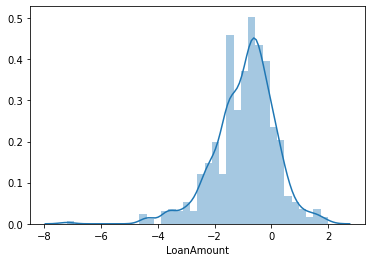

In [147]:
sns.distplot(final['LoanAmount'])

In [150]:
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,source,Total_Income,Total_Income_log,EMI,Balance
0,LP001002,Male,No,0,Graduate,No,5849,0.0,126.0,360.0,1.0,Urban,Y,train,5849.0,8.674026,0.350000,5499.000000
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,train,6091.0,8.714568,0.355556,5735.444444
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,train,3000.0,8.006368,0.183333,2816.666667
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,train,4941.0,8.505323,0.333333,4607.666667
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,train,6000.0,8.699515,0.391667,5608.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777.0,113.0,360.0,1.0,Urban,NaN,test,5786.0,8.663196,0.313889,5472.111111
363,LP002975,Male,Yes,0,Graduate,No,4158,709.0,115.0,360.0,1.0,Urban,NaN,test,4867.0,8.490233,0.319444,4547.555556
364,LP002980,Male,No,0,Graduate,No,3250,1993.0,126.0,360.0,1.0,Semiurban,NaN,test,5243.0,8.564649,0.350000,4893.000000
365,LP002986,Male,Yes,0,Graduate,No,5000,2393.0,158.0,360.0,1.0,Rural,NaN,test,7393.0,8.908289,0.438889,6954.111111


In [151]:
data_dropped = data.dropna()
data_median = data.fillna(data.median())

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,source,Total_Income,Total_Income_log,EMI,Balance
0,LP001002,Male,No,0,Graduate,No,5849,0.0,126.0,360.0,1.0,Urban,Y,train,5849.0,8.674026,0.350000,5499.000000
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,train,6091.0,8.714568,0.355556,5735.444444
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,train,3000.0,8.006368,0.183333,2816.666667
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,train,4941.0,8.505323,0.333333,4607.666667
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,train,6000.0,8.699515,0.391667,5608.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777.0,113.0,360.0,1.0,Urban,NaN,test,5786.0,8.663196,0.313889,5472.111111
363,LP002975,Male,Yes,0,Graduate,No,4158,709.0,115.0,360.0,1.0,Urban,NaN,test,4867.0,8.490233,0.319444,4547.555556
364,LP002980,Male,No,0,Graduate,No,3250,1993.0,126.0,360.0,1.0,Semiurban,NaN,test,5243.0,8.564649,0.350000,4893.000000
365,LP002986,Male,Yes,0,Graduate,No,5000,2393.0,158.0,360.0,1.0,Rural,NaN,test,7393.0,8.908289,0.438889,6954.111111


In [95]:
final_train = final.loc[final['source']=='train']
X = final_train.drop(columns=['source', 'Loan_Status'])
y = final_train['Loan_Status']
print(X.shape)
print(y.shape)

(614, 15)
(614,)


In [96]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [97]:
lr = LogisticRegression(solver='liblinear')
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
accuracy_score(y_test, y_pred)

0.7792207792207793

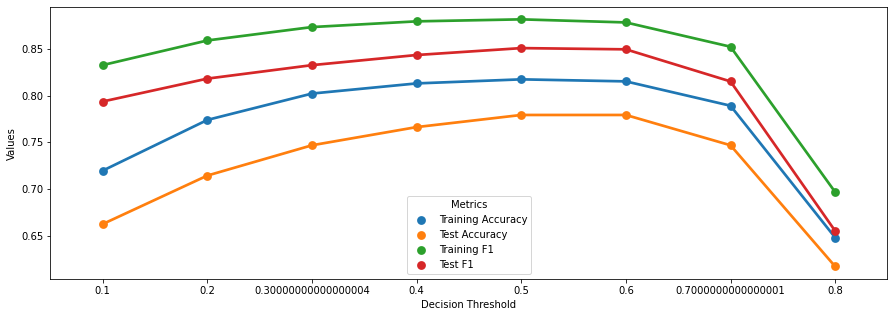

In [109]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_predict

train_accuracies = []
train_f1_scores = []
test_accuracies = []
test_f1_scores = []
thresholds = []

#for thresh in np.linspace(0.1,0.9,8): ## Sweeping from threshold of 0.1 to 0.9
for thresh in np.arange(0.1,0.9,0.1): ## Sweeping from threshold of 0.1 to 0.9
    logreg_clf = LogisticRegression(solver='liblinear')
    logreg_clf.fit(X_train,y_train)
    
    y_pred_train_thresh = logreg_clf.predict_proba(X_train)[:,1]
    y_pred_train = (y_pred_train_thresh > thresh).astype(int)

    train_acc = accuracy_score(y_train,y_pred_train)
    train_f1 = f1_score(y_train,y_pred_train)
    
    y_pred_test_thresh = logreg_clf.predict_proba(X_test)[:,1]
    y_pred_test = (y_pred_test_thresh > thresh).astype(int) 
    
    test_acc = accuracy_score(y_test,y_pred_test)
    test_f1 = f1_score(y_test,y_pred_test)
    
    train_accuracies.append(train_acc)
    train_f1_scores.append(train_f1)
    test_accuracies.append(test_acc)
    test_f1_scores.append(test_f1)
    thresholds.append(thresh)
    
    
Threshold_logreg = {"Training Accuracy": train_accuracies, "Test Accuracy": test_accuracies, "Training F1": train_f1_scores, "Test F1":test_f1_scores, "Decision Threshold": thresholds }
Threshold_logreg_df = pd.DataFrame.from_dict(Threshold_logreg)

plot_df = Threshold_logreg_df.melt('Decision Threshold',var_name='Metrics',value_name="Values")
fig,ax = plt.subplots(figsize=(15,5))
sns.pointplot(x="Decision Threshold", y="Values",hue="Metrics", data=plot_df,ax=ax)

In [111]:
thresh = 0.4 ### Threshold chosen from above Curves
y_pred_test_thresh = logreg_clf.predict_proba(X_test)[:,1]
y_pred = (y_pred_test_thresh > thresh).astype(int) 
print("Test Accuracy: ",accuracy_score(y_test,y_pred))
print("Test F1 Score: ",f1_score(y_test,y_pred))
print("Confusion Matrix on Test Data")
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Test Accuracy:  0.7662337662337663
Test F1 Score:  0.8434782608695651
Confusion Matrix on Test Data


Predicted,0,1,All
True,,,
0.0,21,33,54
1.0,3,97,100
All,24,130,154


In [34]:
paramgrid = {'max_depth': list(range(1,20,2)),'n_estimators':list(range(1,200,20))}
grid_search = GridSearchCV(RandomForestClassifier(random_state=1),paramgrid)

In [35]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=1,
                                

In [36]:
grid_search.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=3, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=41,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [37]:
rf = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=3, max_features='auto',
                       max_leaf_nodes=50, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=41,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=True)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test, y_pred)

0.7727272727272727

In [43]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,f1_score


tree_clf = DecisionTreeClassifier()
tree_clf.fit(X_train,y_train)
y_pred = tree_clf.predict(X_train)
print("Training Data Set Accuracy: ", accuracy_score(y_train,y_pred))
print("Training Data F1 Score ", f1_score(y_train,y_pred))

print("Validation Mean F1 Score: ",cross_val_score(tree_clf,X_train,y_train,cv=5,scoring='f1_macro').mean())
print("Validation Mean Accuracy: ",cross_val_score(tree_clf,X_train,y_train,cv=5,scoring='accuracy').mean())


Training Data Set Accuracy:  1.0
Training Data F1 Score  1.0
Validation Mean F1 Score:  0.6404538377856049
Validation Mean Accuracy:  0.7086956521739131


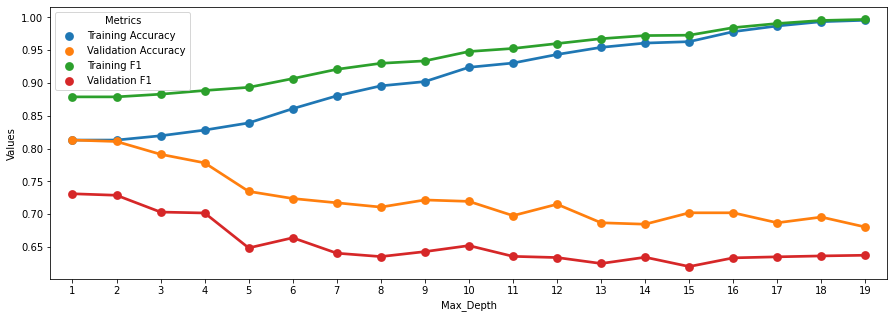

In [44]:
training_accuracy = []
val_accuracy = []
training_f1 = []
val_f1 = []
tree_depths = []

for depth in range(1,20):
    tree_clf = DecisionTreeClassifier(max_depth=depth)
    tree_clf.fit(X_train,y_train)
    y_training_pred = tree_clf.predict(X_train)

    training_acc = accuracy_score(y_train,y_training_pred)
    train_f1 = f1_score(y_train,y_training_pred)
    val_mean_f1 = cross_val_score(tree_clf,X_train,y_train,cv=5,scoring='f1_macro').mean()
    val_mean_accuracy = cross_val_score(tree_clf,X_train,y_train,cv=5,scoring='accuracy').mean()
    
    training_accuracy.append(training_acc)
    val_accuracy.append(val_mean_accuracy)
    training_f1.append(train_f1)
    val_f1.append(val_mean_f1)
    tree_depths.append(depth)
    

Tuning_Max_depth = {"Training Accuracy": training_accuracy, "Validation Accuracy": val_accuracy, "Training F1": training_f1, "Validation F1":val_f1, "Max_Depth": tree_depths }
Tuning_Max_depth_df = pd.DataFrame.from_dict(Tuning_Max_depth)

plot_df = Tuning_Max_depth_df.melt('Max_Depth',var_name='Metrics',value_name="Values")
fig,ax = plt.subplots(figsize=(15,5))
sns.pointplot(x="Max_Depth", y="Values",hue="Metrics", data=plot_df,ax=ax)


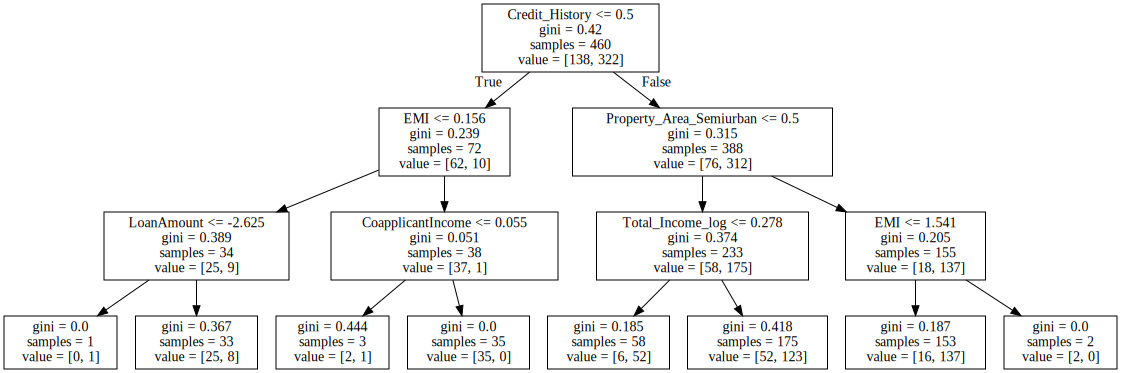

In [48]:
from sklearn import tree
import graphviz
tree_clf = tree.DecisionTreeClassifier(max_depth = 3)
tree_clf.fit(X_train,y_train)
dot_data = tree.export_graphviz(tree_clf,feature_names = X.columns.tolist())
graph = graphviz.Source(dot_data)
graph

In [50]:
from sklearn.metrics import confusion_matrix
tree_clf = DecisionTreeClassifier(max_depth=3,min_samples_leaf = 35)
tree_clf.fit(X_train,y_train)
y_pred = tree_clf.predict(X_test)
print("Test Accuracy: ",accuracy_score(y_test,y_pred))
print("Test F1 Score: ",f1_score(y_test,y_pred))
print("Confusion Matrix on Test Data")
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Test Accuracy:  0.7727272727272727
Test F1 Score:  0.8471615720524017
Confusion Matrix on Test Data


Predicted,0.0,1.0,All
True,,,
0.0,22,32,54
1.0,3,97,100
All,25,129,154


In [98]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.7792207792207793

In [38]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier(n_estimators=50,max_depth=4)
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7467532467532467

In [39]:
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
y_pred = gb.predict(X_test)
accuracy_score(y_test, y_pred)

0.7597402597402597

In [100]:
final_test = final.loc[final['source']=='test']
final_test

,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Total_Income,EMI,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status,source
0,0.589206,0.419620,0.270390,0.176248,0.195646,1.0,1,1,0,0,0,0,0,0,1,NaN,test
1,0.037486,0.210183,0.270390,0.366157,0.148550,1.0,1,1,1,0,0,0,0,0,1,NaN,test
2,0.072858,0.863177,0.270390,0.003036,0.092813,1.0,1,1,0,1,0,0,0,0,1,NaN,test
3,0.347246,0.550517,0.270390,0.314696,0.225080,1.0,1,1,0,1,0,0,0,0,1,NaN,test
4,0.589206,0.838492,0.270390,0.581962,0.289836,1.0,1,0,0,0,0,1,0,0,1,NaN,test
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,0.064398,0.380350,0.270390,0.165292,0.186815,1.0,1,1,0,0,1,1,1,0,1,NaN,test
363,0.328426,0.354171,0.270390,0.317850,0.180928,1.0,1,1,0,0,0,0,0,0,1,NaN,test
364,0.143846,0.210183,0.270390,0.255432,0.148550,1.0,1,0,0,0,0,0,0,1,0,NaN,test
365,0.290971,0.208689,0.270390,0.101476,0.054360,1.0,1,1,0,0,0,0,0,0,0,NaN,test


In [101]:
final_test = final_test.drop(columns=['Loan_Status', 'source'])
final_test

,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Total_Income,EMI,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,0.589206,0.419620,0.270390,0.176248,0.195646,1.0,1,1,0,0,0,0,0,0,1
1,0.037486,0.210183,0.270390,0.366157,0.148550,1.0,1,1,1,0,0,0,0,0,1
2,0.072858,0.863177,0.270390,0.003036,0.092813,1.0,1,1,0,1,0,0,0,0,1
3,0.347246,0.550517,0.270390,0.314696,0.225080,1.0,1,1,0,1,0,0,0,0,1
4,0.589206,0.838492,0.270390,0.581962,0.289836,1.0,1,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,0.064398,0.380350,0.270390,0.165292,0.186815,1.0,1,1,0,0,1,1,1,0,1
363,0.328426,0.354171,0.270390,0.317850,0.180928,1.0,1,1,0,0,0,0,0,0,1
364,0.143846,0.210183,0.270390,0.255432,0.148550,1.0,1,0,0,0,0,0,0,1,0
365,0.290971,0.208689,0.270390,0.101476,0.054360,1.0,1,1,0,0,0,0,0,0,0


In [102]:
predictions = clf.predict(final_test)

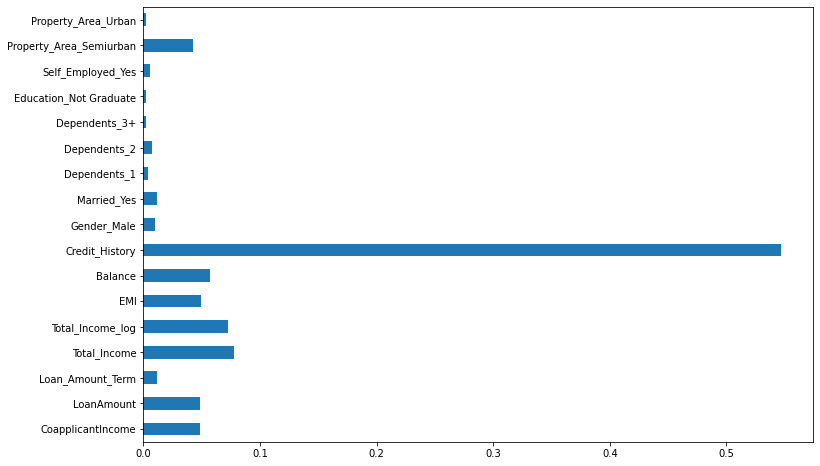

In [42]:
importances = pd.Series(rf.feature_importances_,index=X.columns)
importances.plot(kind='barh', figsize=(12,8))

In [103]:
df  = pd.DataFrame({"Status":predictions})
df["Status"].value_counts()

1.0    295
0.0     72
Name: Status, dtype: int64

In [104]:
submit = pd.DataFrame({"Loan_ID":test['Loan_ID'], "Loan_Status":predictions})
submit

,Loan_ID,Loan_Status
0,LP001015,1.0
1,LP001022,1.0
2,LP001031,1.0
3,LP001035,1.0
4,LP001051,1.0
...,...,...
362,LP002971,1.0
363,LP002975,1.0
364,LP002980,1.0
365,LP002986,1.0


In [105]:
submit['Loan_Status'] = submit['Loan_Status'].map({1:'Y', 0:'N'})
submit['Loan_Status']

0      Y
1      Y
2      Y
3      Y
4      Y
      ..
362    Y
363    Y
364    Y
365    Y
366    Y
Name: Loan_Status, Length: 367, dtype: object

In [107]:
submit.to_csv("new1.csv", index=False)